Conjunto de datos de Trabajo remoto post pandemia
* fuente : UCI Machine Learning Repository
* Tamaño : 345.4+ KB
* entradas : 3157
* Columnas :
 * 0   Survey_Date              3157 non-null   object
 * 1   Age                      3157 non-null   int64
 * 2   Gender                   3157 non-null   object
 * 3   Region                   3157 non-null   object
 * 4   Industry                 3157 non-null   object
 * 5   Job_Role                 3157 non-null   object
 * 6   Work_Arrangement         3157 non-null   object
 * 7   Hours_Per_Week           3157 non-null   int64
 * 8   Mental_Health_Status     2358 non-null   object
 * 9   Burnout_Level            3157 non-null   object
 * 10  Work_Life_Balance_Score  3157 non-null   int64
 * 11  Physical_Health_Issues   2877 non-null   object
 * 12  Social_Isolation_Score   3157 non-null   int64
 * 13  Salary_Range             3157 non-null   object

In [ ]:
# Se usa biblioteca google para poder usar archivos .
from google.colab import drive
# Se conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se cargan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se carga el conjunto de datos
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/dataset3.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

##### Se ve en la lista de columnas que la caracteristica Mental_Health_Status solo tiene 2358 datos. La caracteristica Physical_Health_Issues contiene 2877.
Se deberan corregir la cantidad faltante.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3157.0,43.732024,12.661095,22.0,33.0,44.0,55.0,65.0
Hours_Per_Week,3157.0,49.904973,8.897699,35.0,42.0,50.0,57.0,65.0
Work_Life_Balance_Score,3157.0,2.996516,1.163307,1.0,2.0,3.0,4.0,5.0
Social_Isolation_Score,3157.0,2.704783,1.188887,1.0,2.0,3.0,4.0,5.0


##### Se verifica en la estadistica la columna Age tiene es normal a simple vista con las demas columnas se verifica que estan en rangos normales.



In [ ]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [ ]:
# Se cambio el tipo de dato object a datetime
df["survey_date"] = pd.to_datetime(df["survey_date"])

In [ ]:
df.duplicated().sum()

np.int64(0)

#### No se obtiene filas duplicadas

In [ ]:
df["mental_health_status"].isna().sum()

np.int64(799)

##### Se encuentran 799 datos nulos que hay que revizar

In [ ]:
df["mental_health_status"].unique()

array(['Stress Disorder', 'ADHD', nan, 'Burnout', 'Anxiety', 'PTSD',
       'Depression'], dtype=object)

In [ ]:
df["mental_health_status"] = df["mental_health_status"].astype(str)
df.loc[df["mental_health_status"] == 'nan', "mental_health_status"] = df["mental_health_status"].mode()[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   survey_date              3157 non-null   datetime64[ns]
 1   age                      3157 non-null   int64         
 2   gender                   3157 non-null   object        
 3   region                   3157 non-null   object        
 4   industry                 3157 non-null   object        
 5   job_role                 3157 non-null   object        
 6   work_arrangement         3157 non-null   object        
 7   hours_per_week           3157 non-null   int64         
 8   mental_health_status     3157 non-null   object        
 9   burnout_level            3157 non-null   object        
 10  work_life_balance_score  3157 non-null   int64         
 11  physical_health_issues   2877 non-null   object        
 12  social_isolation_score   3157 non-

In [ ]:
df["physical_health_issues"].isna().sum()

np.int64(280)

In [ ]:
df[df["physical_health_issues"].isna()]

,survey_date,age,gender,region,industry,job_role,work_arrangement,hours_per_week,mental_health_status,burnout_level,work_life_balance_score,physical_health_issues,social_isolation_score,salary_range
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,nan,Medium,5,NaN,4,$60K-80K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
14,2025-06-01,50,Male,Europe,Professional Services,Social Media Manager,Remote,64,Burnout,Medium,1,NaN,4,$60K-80K
19,2025-06-01,27,Female,Africa,Healthcare,Account Manager,Remote,43,nan,Medium,1,NaN,4,$80K-100K
25,2025-06-01,59,Male,Africa,Education,Social Media Manager,Onsite,53,Anxiety,Medium,3,NaN,1,$60K-80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,2025-06-26,35,Female,North America,Professional Services,Content Writer,Onsite,38,nan,Medium,3,NaN,1,$60K-80K
3131,2025-06-26,45,Female,Europe,Manufacturing,HR Manager,Hybrid,40,nan,High,2,NaN,1,$60K-80K
3133,2025-06-26,47,Female,Asia,Healthcare,Data Analyst,Onsite,38,PTSD,Low,5,NaN,3,$120K+
3137,2025-06-26,24,Female,Oceania,Healthcare,Customer Service Manager,Onsite,47,nan,Medium,2,NaN,1,$40K-60K


In [ ]:
df["physical_health_issues"].unique()

array(['Shoulder Pain; Neck Pain', 'Back Pain',
       'Shoulder Pain; Eye Strain', nan, 'Back Pain; Shoulder Pain',
       'Back Pain; Shoulder Pain; Wrist Pain', 'Neck Pain',
       'Shoulder Pain', 'Eye Strain; Wrist Pain', 'Back Pain; Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain', 'Back Pain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain', 'Eye Strain',
       'Back Pain; Shoulder Pain; Eye Strain; Neck Pain',
       'Eye Strain; Neck Pain', 'Shoulder Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain', 'Wrist Pain',
       'Back Pain; Shoulder Pain; Neck Pain',
       'Back Pain; Eye Strain; Neck Pain',
       'Back Pain; Shoulder Pain; Eye Strain; Wrist Pain',
       'Shoulder Pain; Eye Strain; Neck Pain', 'Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Neck Pain; Wrist Pain',
       'Back Pain; Eye Strain; Wrist Pain',
       'Back Pain; Neck Pain; Wrist Pain', 'Shoulder Pain; Wrist Pain',
       'Back Pain; Shoulder Pain; Ey

In [ ]:
# Se aplico la moda de la columna despues de cambiar el tipo de dato a str
df["physical_health_issues"] = df["physical_health_issues"].astype(str)

In [ ]:
df.loc[df["physical_health_issues"] == 'nan', "physical_health_issues"] = df["physical_health_issues"].mode()[0]

In [ ]:
df["physical_health_issues"].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   survey_date              3157 non-null   datetime64[ns]
 1   age                      3157 non-null   int64         
 2   gender                   3157 non-null   object        
 3   region                   3157 non-null   object        
 4   industry                 3157 non-null   object        
 5   job_role                 3157 non-null   object        
 6   work_arrangement         3157 non-null   object        
 7   hours_per_week           3157 non-null   int64         
 8   mental_health_status     3157 non-null   object        
 9   burnout_level            3157 non-null   object        
 10  work_life_balance_score  3157 non-null   int64         
 11  physical_health_issues   3157 non-null   object        
 12  social_isolation_score   3157 non-

#### Se visualizaran los datos

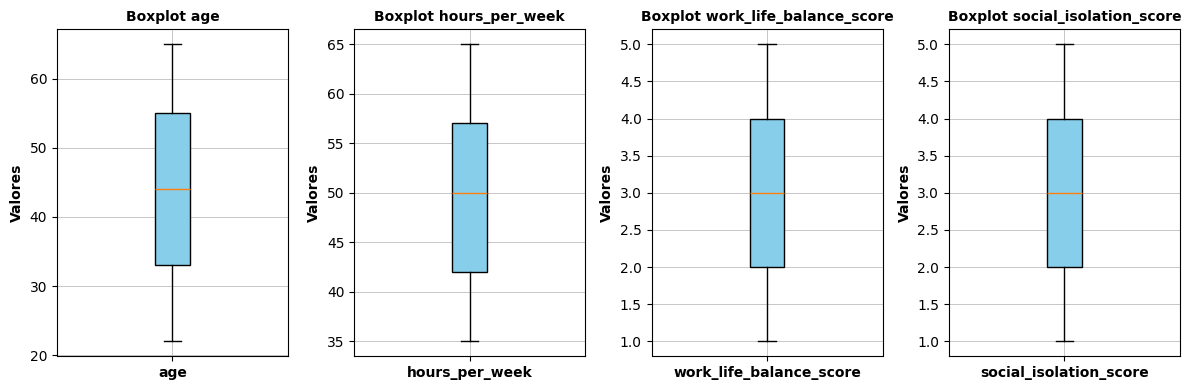

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(1,4, figsize=(12, 4))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### En los gráficos se ve claramente que los datos estan distribuidos en forma normal sin datos atipicos.

In [ ]:
# Se reviza los datos con la correlaciones de Pearson

df_numericas = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

                              age  hours_per_week  work_life_balance_score  \
age                      1.000000        0.003748                -0.022523   
hours_per_week           0.003748        1.000000                -0.014879   
work_life_balance_score -0.022523       -0.014879                 1.000000   
social_isolation_score  -0.003005       -0.003941                -0.004639   

                         social_isolation_score  
age                                   -0.003005  
hours_per_week                        -0.003941  
work_life_balance_score               -0.004639  
social_isolation_score                 1.000000  


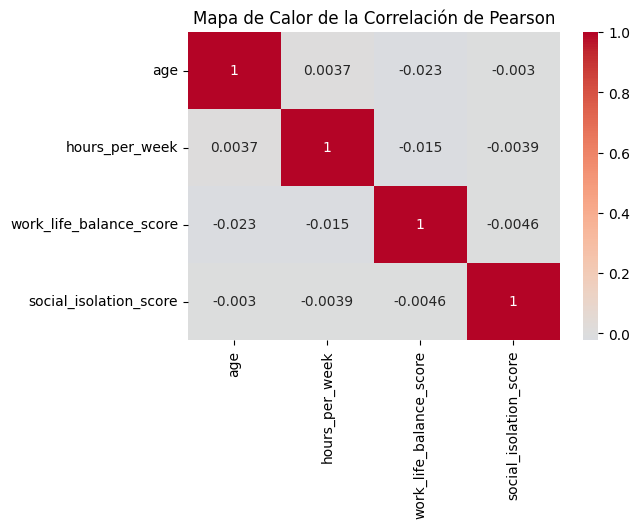

In [ ]:
# Se Crea el  mapas de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### El mapa de calor entrego las siguientes correlaciones:

* Entre age y hours_per_wek 0.0037, casi ceron no hay correlación lineal entre la edad y las horas trabajadas por semana.
* Correlación age y work_life_balance_score: una correlación negativa muy debil.
* Correlación entre age y social_isolation_score. practicamente cero. no hay correlación lineal.
*Correlación entre hours_per_week y social_insolation_score. casi cero , no hay correlaión.
*Correlación entre work_life_balance_score y social _isolation_score. cercano a cero , no hay correlacón lineal.

#### Se concluye que las variables no tienen correlacipon o es minima.